In [6]:
# Poisson equation solved using 
# ModelingToolkit and problem formulation
# from CFD Julia: https://www.mdpi.com/2311-5521/4/3/159
# https://docs.sciml.ai/MethodOfLines/stable/tutorials/heat/
# https://docs.sciml.ai/MethodOfLines/stable/tutorials/heat/
# TODO: Could i use gridap to extract linear system of equations
# from interface??
using OrdinaryDiffEq
using ModelingToolkit, NonlinearSolve
using MethodOfLines, DomainSets
using PyPlot
using Plots: surface, surface!

In [18]:
# Method of Manufactured Solutions: exact solution
function u_exact(xi, yi) 
    x = xi
    y = yi
    return sin(2*π*x)*sin(2*π*y) + 1/16^2*sin(32*π*x)*sin(32*π*y)
end 

# Parameters, variables, and derivatives
@parameters x y
@variables u(..)
Dxx = Differential(x)^2
Dyy = Differential(y)^2

function f(x, y)
    return -8*π^2*sin(2*π*x)*sin(2*π*y) - 8*π^2*sin(32*π*x)*sin(32*π*y)
end

# 1D PDE and boundary conditions
eq  = Dxx(u(x,y)) + Dyy(u(x,y)) ~ f(x, y)

bcs = [
    u(x, 0) ~ 0,
    u(x, 1) ~ 0,
    u(0, y) ~ 0,
    u(1, y) ~ 0]

# Space and time domains
domains = [x ∈ Interval(0.0, 1.0),
           y ∈ Interval(0.0, 1.0)]

# PDE system
@named poisson = PDESystem(eq, bcs, domains, [x, y], [u(x, y)])

# Method of lines discretization
dx = 0.01
dy = 0.01
discretization = MOLFiniteDifference(
    [x => dx, y => dy], 
    nothing)

getintervalrange(d::Symbolics.VarDomainPairing, Δd::Float64) = d.domain.left:Δd:d.domain.right

prob = discretize(poisson, discretization)
sol = NonlinearSolve.solve(prob, NewtonRaphson())
    
u_sol = sol[u(x, y)]

LoadError: InterruptException:

In [3]:
x_pts, y_pts = getintervalrange.(domains, [dx, dy])

2-element Vector{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}:
 0.0:0.1:1.0
 0.0:0.1:1.0

In [16]:
u_exact_sols = u_exact.(x_pts', y_pts)
isapprox.(u_sol, u_exact_sols; atol=1e-4)

11×11 BitMatrix:
 1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1
 1  1  0  1  1  1  1  1  0  1  1
 1  1  1  0  1  1  1  0  1  1  1
 1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1
 1  1  1  0  1  1  1  0  1  1  1
 1  1  0  1  1  1  1  1  0  1  1
 1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1

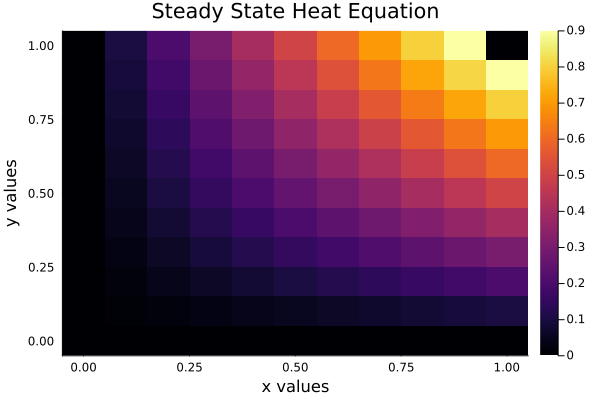

In [16]:
using ModelingToolkit, MethodOfLines, DomainSets, NonlinearSolve

@parameters x y
@variables u(..)
Dxx = Differential(x)^2
Dyy = Differential(y)^2

eq = Dxx(u(x, y)) + Dyy(u(x, y)) ~ 0

bcs = [u(0, y) ~ x * y,
       u(1, y) ~ x * y,
       u(x, 0) ~ x * y,
       u(x, 1) ~ x * y]


# Space and time domains
domains = [x ∈ Interval(0.0, 1.0),
           y ∈ Interval(0.0, 1.0)]

@named pdesys = PDESystem([eq], bcs, domains, [x, y], [u(x, y)])

dx = 0.1
dy = 0.1

# Note that we pass in `nothing` for the time variable `t` here since we
# are creating a stationary problem without a dependence on time, only space.
discretization = MOLFiniteDifference([x => dx, y => dy], nothing, approx_order=2)

prob = discretize(pdesys, discretization)
sol = NonlinearSolve.solve(prob, NewtonRaphson())

u_sol = sol[u(x, y)]

using Plots

heatmap(sol[x], sol[y], u_sol, xlabel="x values", ylabel="y values",
        title="Steady State Heat Equation")

In [22]:
propertynames(prob)

(:f, :u0, :p, :problem_type, :kwargs)

In [1]:
?

search: *



```
*(s::Union{AbstractString, AbstractChar}, t::Union{AbstractString, AbstractChar}...) -> AbstractString
```

Concatenate strings and/or characters, producing a [`String`](@ref). This is equivalent to calling the [`string`](@ref) function on the arguments. Concatenation of built-in string types always produces a value of type `String` but other string types may choose to return a string of a different type as appropriate.

# Examples

```jldoctest
julia> "Hello " * "world"
"Hello world"

julia> 'j' * "ulia"
"julia"
```

---

```
*(s::Regex, t::Union{Regex,AbstractString,AbstractChar}) -> Regex
*(s::Union{Regex,AbstractString,AbstractChar}, t::Regex) -> Regex
```

Concatenate regexes, strings and/or characters, producing a [`Regex`](@ref). String and character arguments must be matched exactly in the resulting regex, meaning that the contained characters are devoid of any special meaning (they are quoted with "\Q" and "\E").

!!! compat "Julia 1.3"
    This method requires at least Julia 1.3.


# Examples

```jldoctest
julia> match(r"Hello|Good bye" * ' ' * "world", "Hello world")
RegexMatch("Hello world")

julia> r = r"a|b" * "c|d"
r"(?:a|b)\Qc|d\E"

julia> match(r, "ac") == nothing
true

julia> match(r, "ac|d")
RegexMatch("ac|d")
```

---

```
*(x, y...)
```

Multiplication operator. `x*y*z*...` calls this function with all arguments, i.e. `*(x, y, z, ...)`.

# Examples

```jldoctest
julia> 2 * 7 * 8
112

julia> *(2, 7, 8)
112
```

---

```
*(A::AbstractMatrix, B::AbstractMatrix)
```

Matrix multiplication.

# Examples

```jldoctest
julia> [1 1; 0 1] * [1 0; 1 1]
2×2 Matrix{Int64}:
 2  1
 1  1
```

---

```
*(A, B::AbstractMatrix, C)
A * B * C * D
```

Chained multiplication of 3 or 4 matrices is done in the most efficient sequence, based on the sizes of the arrays. That is, the number of scalar multiplications needed for `(A * B) * C` (with 3 dense matrices) is compared to that for `A * (B * C)` to choose which of these to execute.

If the last factor is a vector, or the first a transposed vector, then it is efficient to deal with these first. In particular `x' * B * y` means `(x' * B) * y` for an ordinary column-major `B::Matrix`. Unlike `dot(x, B, y)`, this allocates an intermediate array.

If the first or last factor is a number, this will be fused with the matrix multiplication, using 5-arg [`mul!`](@ref).

See also [`muladd`](@ref), [`dot`](@ref).

!!! compat "Julia 1.7"
    These optimisations require at least Julia 1.7.

